Team:
1. Dishant Fapot
2. Parth Zaveri

Dataset 1
https://www.kaggle.com/jayrav13/unemployment-by-county-us
Unemployment rate by County
(885549,5) with size 34.1 MB	
Dataset 2
https://www.kaggle.com/stevepalley/2016uspresidentialvotebycounty
2016 US Presidential vote election
(18476,9) with 1.6 MB
Dataset 3
https://www.kaggle.com/alifarukyucel/minimum-wage-by-state/data
(2751,9) with 170 KB
Hypothesis
We will merge both the dataset and find if US elections has any impact or relation with the unemployment rate in the country.


Import all the required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline           

Analysis of 2016 presidential election

In [47]:
election = pd.read_csv('./pres16results.csv') #read the data
election.head()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [4]:
election.shape #shape of the data

(18475, 9)

In [5]:
election.isnull().sum() #number of nulls in individual column

county         344
fips             0
cand           124
st             124
pct_report     124
votes          124
total_votes    124
pct            124
lead           124
dtype: int64

<AxesSubplot:>

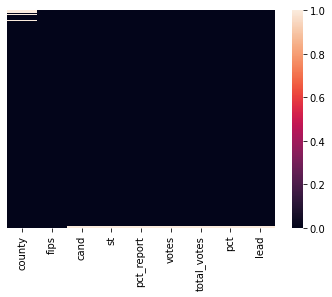

In [6]:
 sns.heatmap(election.isnull(),yticklabels=False) #heatmap to showing nulls 

In [7]:
election.dropna(inplace = True) #droping null values from the dataset

In [8]:
election['cand'].nunique() #Total number of condidates for 2016 presidential election

32

In [9]:
election['lead'].unique() #Lead candidates

array(['Hillary Clinton', 'Donald Trump'], dtype=object)

countplot to get candidate with highest winning counties

C:\Users\Dishant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


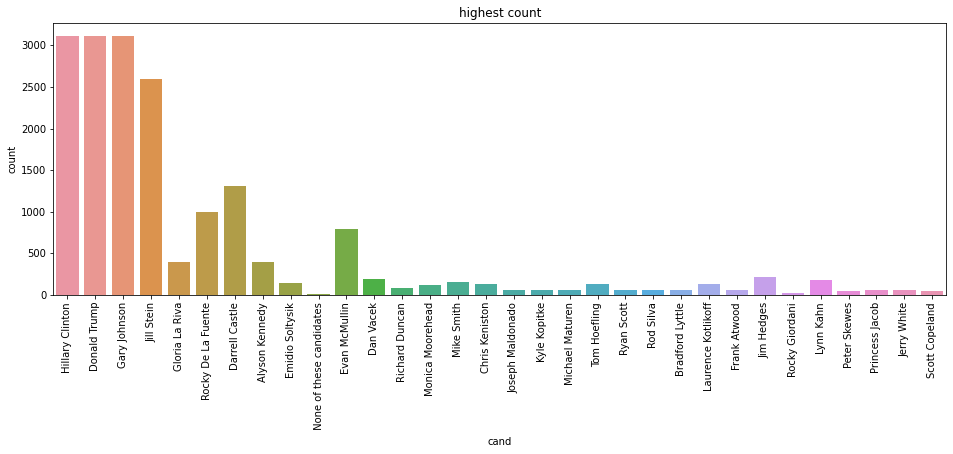

In [10]:
plt.subplots(figsize=(16,5))
sns.countplot('cand',data=election)
plt.xticks(rotation=90) # to rotate the xPoints by 90 degrees
plt.title('highest count')
plt.show()

states with most voting

Text(0.5, 1.0, 'states with most voting')

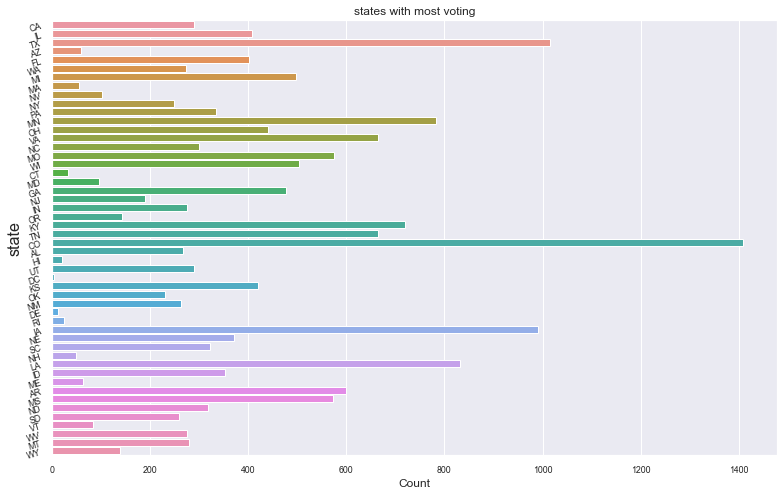

In [11]:
fig = plt.figure(figsize=(13, 8))
sns.set(font_scale=0.8) #for axis points fontsize
year = sns.countplot(y='st', data=election)
year.set_yticklabels(year.get_yticklabels(), rotation=17)
plt.ylabel('state', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.title('states with most voting', fontsize=12)

Comparing leads of most voted state i.e. colorado

In [48]:
CO_trump = sum(election[(election['st']=='CO') & (election['lead']=="Donald Trump")].value_counts())
print('Number of Counties Trump Lead in CO : ',CO_trump)
CO_clinton =  sum(election[(election['st']=='CO') & (election['lead']=="Hillary Clinton")].value_counts())
print('Number of County Hillary Clinton in CO: ',CO_clinton)

Number of Counties Trump Lead in CO :  902
Number of County Hillary Clinton in CO:  506


Overall lead of the two leads

<AxesSubplot:xlabel='lead', ylabel='count'>

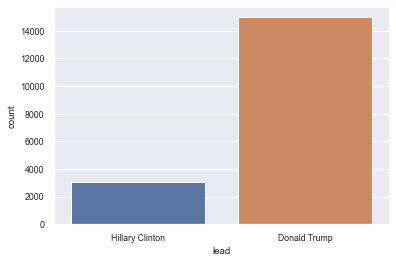

In [13]:
sns.countplot(x='lead',data=election)

Analysis of unemployment rate in United States by County

In [2]:
unemp = pd.read_csv('./output.csv') #read the data
unemp.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [3]:
unemp.shape

(885548, 5)

In [4]:
unemp.isnull().sum()

Year      0
Month     0
State     0
County    0
Rate      0
dtype: int64

In [5]:
#Count of each state data which shows Texas is the most repeated
states=unemp['State'].value_counts()
states

Texas             57658
Virginia          39900
Missouri          37260
Kentucky          36360
Kansas            34020
Illinois          33048
North Carolina    32400
Iowa              32076
Tennessee         30780
Nebraska          30132
Indiana           29808
Ohio              28512
Minnesota         28188
Mississippi       26568
Oklahoma          24948
Arkansas          24300
Michigan          24236
Wisconsin         23328
Alabama           21708
Pennsylvania      21708
South Dakota      21384
Colorado          20736
New York          20088
Montana           18144
West Virginia     17820
North Dakota      17172
California        16878
South Carolina    14904
Idaho             14256
Washington        12636
Oregon            11664
New Mexico        10692
Utah               9396
Maryland           7776
Wyoming            7452
New Jersey         6804
Louisiana          6464
Nevada             5508
Maine              5184
Arizona            4860
Vermont            4536
Massachusetts   

C:\Users\Dishant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


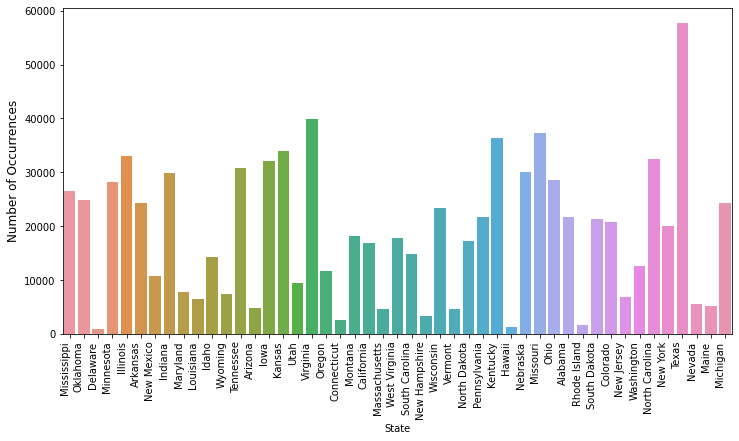

In [6]:
#Count of States
plt.figure(figsize=(12,6))
s = sns.countplot(unemp['State'])
plt.ylabel('Number of Occurrences', fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [49]:
unemp_rate = unemp.Rate.max() #Hieghest unemployment rate of any state
unemp_rate

58.4

In [50]:
unemp[unemp['Rate']>58]['State'] #Result shows Colorado has highest unempoyment rates and this is the same state with highest number of voters.

351231    Colorado
Name: State, dtype: object

Average unemployment rate per state

In [9]:
Avg_rate = unemp[['State', 'Rate']]
Avg_rate_= Avg_rate.groupby(['State'],as_index=False).mean()
Avg_rate_ = Avg_rate_.sort_values(['Rate'], ascending=False)
Avg_rate_

,State,Rate
1,Arizona,9.274588
3,California,9.045005
20,Mississippi,8.320517
18,Michigan,8.136136
44,West Virginia,8.104809
43,Washington,8.031513
36,South Carolina,7.978737
33,Oregon,7.849271
14,Louisiana,7.812949
0,Alabama,7.723844


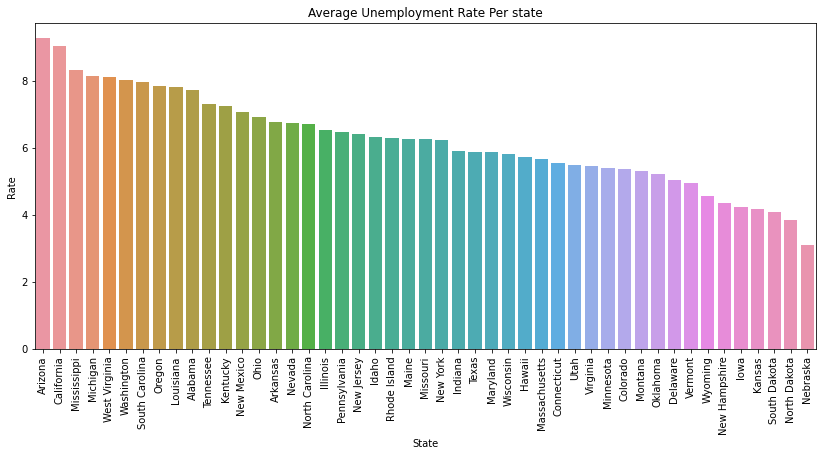

In [10]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x='State', y='Rate', data=Avg_rate_, ax=ax)
plt.title('Average Unemployment Rate Per state')
plt.xticks(rotation='vertical')
plt.show()

In [11]:
year_unemp = unemp[['Year', 'Rate']]
year_unemp_ = unemp.groupby(['Year'], as_index = False).mean()
year_unemp_ = year_unemp_.sort_values(['Year'], ascending = False)
year_unemp_

,Year,Rate
26,2016,5.160680
25,2015,5.401873
24,2014,6.096365
23,2013,7.211610
22,2012,7.657544
21,2011,8.523477
20,2010,9.189580
19,2009,8.883838
18,2008,5.759990
17,2007,4.896069


Unemployment rate by Year

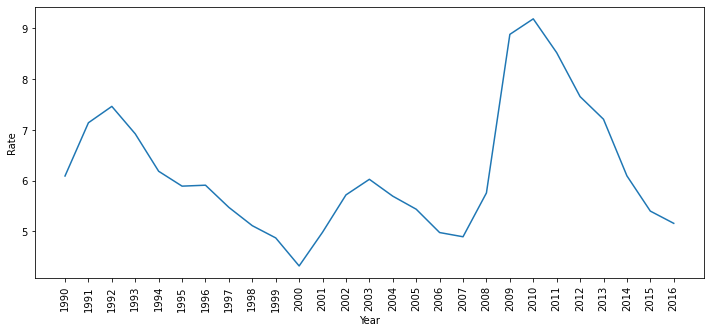

In [12]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(x='Year', y='Rate', data=year_unemp_, markers=True, ax=ax)
ax.set_xticks(ticks=unemp['Year'].value_counts(ascending=True).index)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
#Importing minimum wage data
df = pd.read_csv('./Minimum Wage Data.csv',encoding='cp1252')
df.head()

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [18]:
#Minimum wage data by State
act = pd.DataFrame()


for name, group in df.groupby("State"):
    if act.empty:
        act = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        act = act.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))

act.head()


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [19]:
act = act.replace(0, np.NaN).dropna(axis=1)
act.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,15.12,1.12,11.88,7.20,10.08,9.00,9.00,8.28,9.00,9.00,...,8.28,3.10,10.08,3.06,7.20,10.08,11.52,7.20,9.00,8.64
1969,14.33,1.07,11.26,6.83,9.56,8.53,8.53,7.85,8.53,8.53,...,7.85,2.94,9.56,2.90,6.83,9.56,10.92,6.83,8.53,8.19
1970,13.54,7.09,10.64,6.45,10.32,8.06,10.32,8.38,10.32,10.32,...,8.38,2.77,10.32,6.45,6.45,10.32,10.32,6.45,8.38,8.38
1971,12.99,6.80,10.20,6.18,9.89,7.73,9.89,8.04,9.89,9.89,...,8.04,2.66,9.89,6.18,6.18,9.89,9.89,6.18,8.04,8.04
1972,12.57,7.19,9.88,5.99,11.08,9.58,9.58,9.58,11.38,9.58,...,9.58,3.89,9.58,5.99,7.19,9.58,9.58,7.19,8.68,8.98


In [20]:
#Function to get unemployment data as per year and state
def get_min_wage(year, state):
    try:
        return act.loc[year][state]
    except:
        return np.NaN

In [21]:
get_min_wage(2012, "Colorado")


8.33

In [22]:
%%time
# time will give us the total time to perform some cell's operation.

unemp['min_wage'] = list(map(get_min_wage, unemp['Year'], unemp['State']))

Wall time: 2min 11s


In [23]:
unemp[['Rate','min_wage']].corr()

,Rate,min_wage
Rate,1.000000,0.153047
min_wage,0.153047,1.000000


renaming name of columns so that it matches with the name of other dataset we are using to join them.

In [30]:
election.rename(columns={"county": "County", "st": "State"}, inplace=True)
election.head()

,County,fips,cand,State,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


unemployment data of all county for the year 2015, month Feb

In [31]:
county15 = unemp[ (unemp['Year']==2015) & (unemp["Month"]=="February")]

In [32]:
county15.head()

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,NaN
1,2015,February,Mississippi,Panola County,9.4,NaN
2,2015,February,Mississippi,Monroe County,7.9,NaN
3,2015,February,Mississippi,Hinds County,6.1,NaN
4,2015,February,Mississippi,Kemper County,10.6,NaN


Changing the abbrevation for the by importing CSV file for all the abbrevation

In [33]:
state_abbv = pd.read_csv("./state_abbv.csv", index_col=0)
state_abbv.head()

,Postal Code
State/District,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


convert the State to the all-caps abbreviation and mapping them to county15

In [34]:
state_abbv_dict = state_abbv.to_dict()['Postal Code']
county15['State'] = county15['State'].map(state_abbv_dict)

C:\Users\Dishant\AppData\Local\Temp/ipykernel_1400/3138682014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_2015['State'] = county_2015['State'].map(state_abbv_dict)


In [35]:
county15.tail()

,Year,Month,State,County,Rate,min_wage
2797,2015,February,ME,Somerset County,8.4,7.92
2798,2015,February,ME,Oxford County,6.8,7.92
2799,2015,February,ME,Knox County,6.1,7.92
2800,2015,February,ME,Piscataquis County,7.0,7.92
2801,2015,February,ME,Aroostook County,7.2,7.92


Since election dataset is longer, we'll map that to county_15, where there are matches. Getting data for cand "Donald Trump"

In [36]:
for df in [county15, election]:
    df.set_index(["County", "State"], inplace=True)
pres16 = election[election['cand']=="Donald Trump"]
pres16 = pres16[['pct']]
pres16.dropna(inplace=True)
pres16.head(2)

pct
County State          
NaN    US     0.472993
       CA     0.330641

In [37]:
county15.head(2)

,,Year,Month,Rate,min_wage
County,State,,,,
Newton County,MS,2015,February,6.1,NaN
Panola County,MS,2015,February,9.4,NaN


finding correlation by merging the matched columns from "County" & "State"

In [38]:
correl = county15.merge(pres16, on=["County", "State"])
correl.dropna(inplace=True)
correl.drop("Year", axis=1, inplace=True)
correl.head()

,,Month,Rate,min_wage,pct
County,State,,,,
Major County,OK,February,2.6,2.11,0.864960
Pottawatomie County,OK,February,4.5,2.11,0.701342
Johnston County,OK,February,6.5,2.11,0.770057
Jefferson County,OK,February,5.0,2.11,0.812367
Beaver County,OK,February,2.8,2.11,0.888243


In [40]:
correl.corr()

,Rate,min_wage,pct
Rate,1.000000,0.186689,-0.085985
min_wage,0.186689,1.000000,-0.325036
pct,-0.085985,-0.325036,1.000000


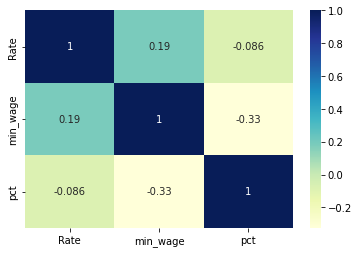

In [45]:
#Visualizing the correlation between the presidential percentage, minimun wage and the unemployment rate in USA
import seaborn as sns
dataplot = sns.heatmap(correl.corr(), cmap="YlGnBu", annot=True)
plt.show()

Surprisingly, min wage appears to have a negative relationship with Trump's percentage vote, implying that as the minimum wage rises, individuals are less likely to vote for Trump.
Also Colorado has the highest unemployment rate whereas it also has the highest percentage of voters with Donald Trump leading in votes.

References:
    https://matplotlib.org/stable/tutorials/introductory/pyplot.html
    https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
    https://www.programiz.com/python-programming/methods/built-in/map